In [1]:
# We import the modules needed.
import sys, os, datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim
import utils.utils as utils

mnisttrain = utils.load_mnist("data/","train")
mnisttest = utils.load_mnist("data/","t10k")
train_data = mnisttrain[0]
train_label = mnisttrain[1]
test_data = mnisttest[0]
test_label = mnisttest[1]
np.unique(train_label)

In [2]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)
# Reshape to image for visualization
train_data = mnist.train.images
train_label = mnist.train.labels
test_data = mnist.test.images
test_label = mnist.test.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
train_dataSet = utils.DataSet(train_data, train_label)
test_dataSet = utils.DataSet(test_data, test_label)

In [4]:
# Parameters for the neural net
# step size for gradient decsent
learning_rate = 0.0005
#Iterations of forward and back pass
training_iters = 2**20

#size of each batch used for forward/backwards pass
batch_size = 1

# how often we write to console and to tensorboard the tensorboard
display_step = 64

# Network Parameters
#size of the kernel the local region that is slid along the convolution
kernel = 5

#amount of output classes
n_classes = 10

# Dropout to reguralize and ensure we dont overfit.
# it basically disables some random nodes each forward/backwards pass
# to enforce new paths to be discovered in the net. Not used in testing.
dropout = 0.50 # Dropout, probability to keep units

# tf Graph input
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, [None, 28 * 28])
    y = tf.placeholder(tf.int64, None)
    keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)
    Z = tf.placeholder(tf.float32, shape=[None, 100], name='Z')

In [5]:
# Create model using wrappers
# the model is identical
def generator(x):
    with tf.variable_scope("generator"):
        x = tf.reshape(x, [-1, 10, 10, 1]) # bwhc
        conv_1 = tf.layers.conv2d(x, 2, 3, padding = 'same', activation = tf.nn.relu)
        conv_1 = tf.layers.conv2d(conv_1, 8, 3, padding = 'same', activation = tf.nn.relu)
        conv_1 = tf.layers.conv2d(conv_1, 16, 3, padding = 'same', activation = tf.nn.relu)
        ds1 = tf.depth_to_space(conv_1, 2)
        print(ds1)
        conv_2 = tf.layers.conv2d(ds1, 32, 3, activation = tf.nn.relu)
        conv_2 = tf.layers.conv2d(conv_2, 32, 3, activation = tf.nn.relu)
        # 1st conv-layer block
        print(conv_2)
        ds2 = tf.depth_to_space(conv_2, 2)
        conv_3 = tf.layers.conv2d(ds2, 8, 3, activation = tf.nn.relu)
        conv_3 = tf.layers.conv2d(conv_3, 8, 3, activation = tf.nn.relu)
        out = tf.layers.conv2d(conv_3, 1, 1, activation = tf.nn.sigmoid)
        print(out)
    return out

In [6]:
# Create model using wrappers
# the model is identical
def discriminator(x, reuse = False):
    with tf.variable_scope("discriminator", reuse=reuse):
        # 1st conv-layer block
        x = tf.reshape(x, [-1, 28, 28, 1]) # bwhc
        conv_1 = tf.layers.conv2d(x, 16,5, padding = 'same', activation=tf.nn.relu)
        conv_2 = tf.layers.conv2d(conv_1, 32, 5, padding = 'same', activation=tf.nn.relu)
        conv_2 = tf.layers.conv2d(conv_2, 8, 3, padding = 'same', activation=tf.nn.relu)
        flat = slim.flatten(conv_2)
        D_logit = tf.layers.dense(flat, 784, activation=None)
        D_prob = tf.nn.sigmoid(D_logit)
    return D_prob, D_logit

In [7]:
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

In [8]:
# Define loss and optimizer
G_sample = generator(Z)
D_real, D_logit_real = discriminator(x)
D_fake, D_logit_fake = discriminator(G_sample, reuse = True)

Tensor("generator/DepthToSpace:0", shape=(?, 20, 20, 4), dtype=float32)
Tensor("generator/conv2d_5/Relu:0", shape=(?, 16, 16, 32), dtype=float32)
Tensor("generator/conv2d_8/Sigmoid:0", shape=(?, 28, 28, 1), dtype=float32)


In [9]:
with tf.name_scope('loss'):
    #find mean loss of batch
    D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1. - D_fake))
    G_loss = -tf.reduce_mean(tf.log(D_fake))

    
with tf.name_scope('optimizer'):
    # Only update D(X)'s parameters, so var_list = theta_D
    D_solver = tf.train.AdamOptimizer().minimize(D_loss)
    # Only update G(X)'s parameters, so var_list = theta_G
    G_solver = tf.train.AdamOptimizer().minimize(G_loss)


# Add scalars to Tensorboard
tf.summary.scalar("Disc_Loss", D_loss)
tf.summary.scalar("Gen_Loss", G_loss)
merged_summaries = tf.summary.merge_all()

# Initializing the variables
init = tf.global_variables_initializer()

In [ ]:
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

(16, 28, 28, 1)


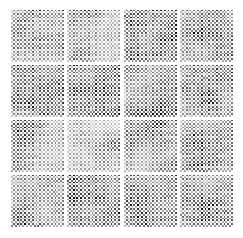

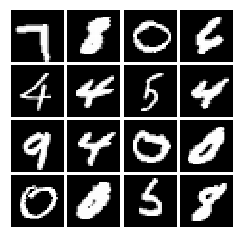

(16, 28, 28, 1)


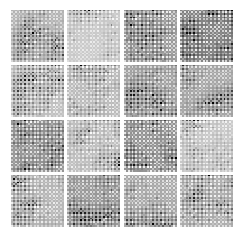

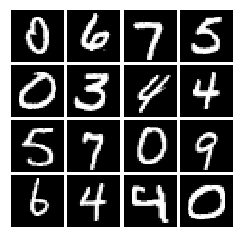

(16, 28, 28, 1)


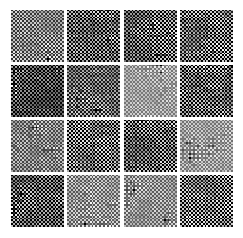

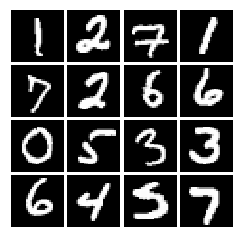

(16, 28, 28, 1)


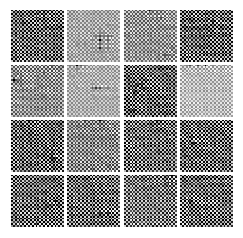

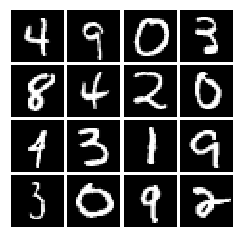

(16, 28, 28, 1)


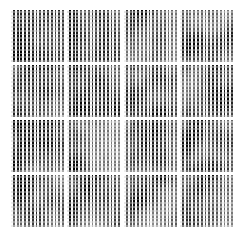

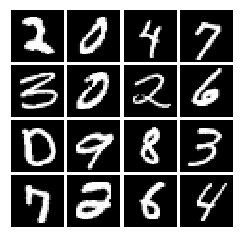

(16, 28, 28, 1)


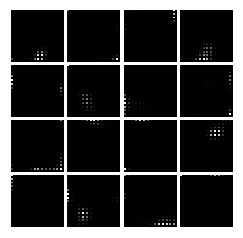

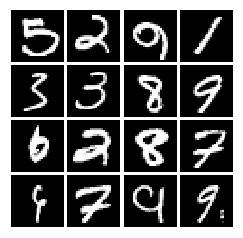

(16, 28, 28, 1)


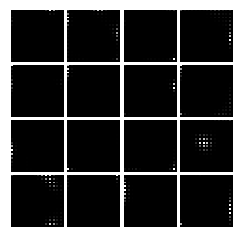

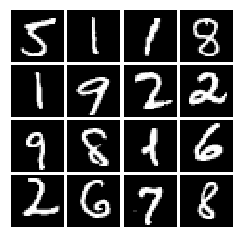

(16, 28, 28, 1)


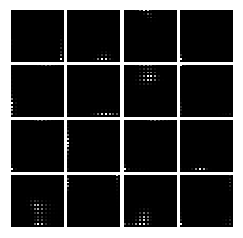

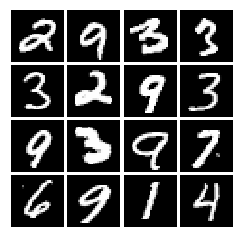

(16, 28, 28, 1)


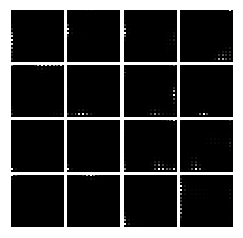

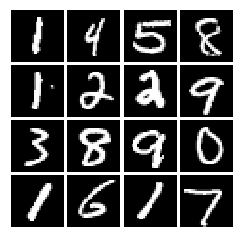

(16, 28, 28, 1)


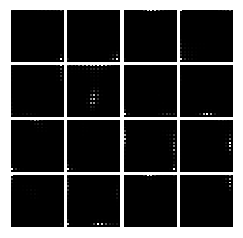

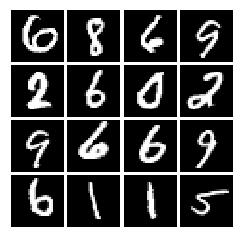

(16, 28, 28, 1)


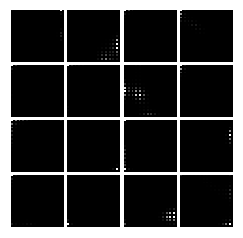

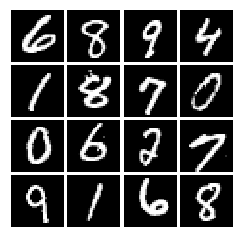

(16, 28, 28, 1)


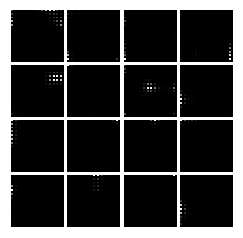

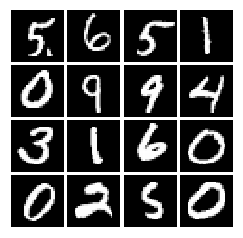

(16, 28, 28, 1)


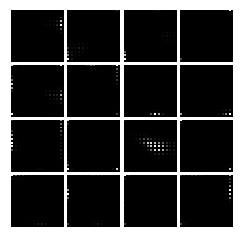

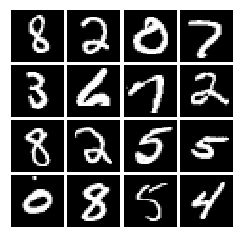

(16, 28, 28, 1)


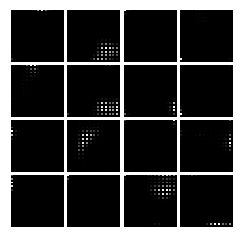

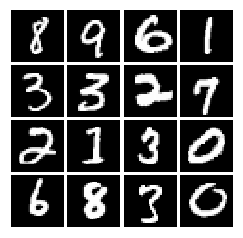

(16, 28, 28, 1)


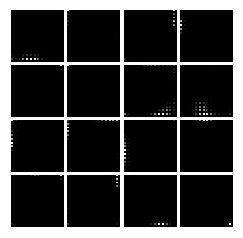

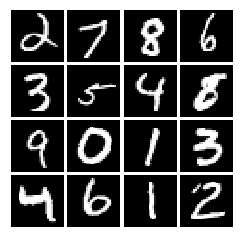

(16, 28, 28, 1)


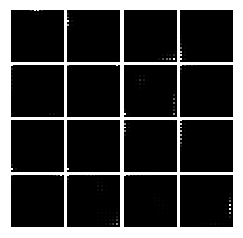

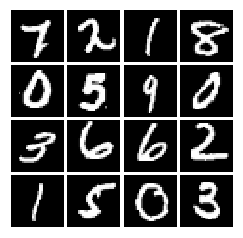

(16, 28, 28, 1)


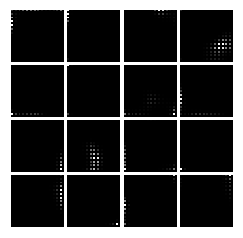

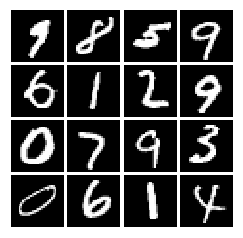

(16, 28, 28, 1)


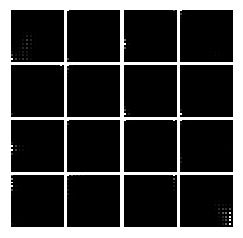

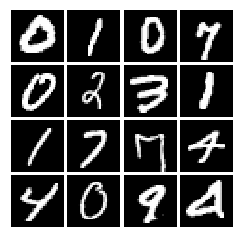

(16, 28, 28, 1)


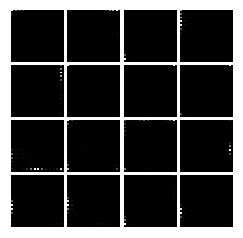

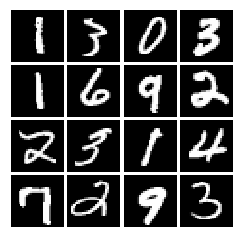

(16, 28, 28, 1)


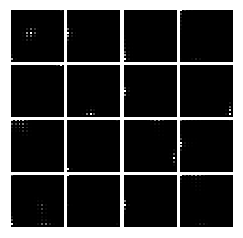

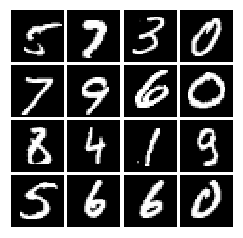

(16, 28, 28, 1)


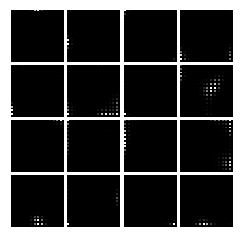

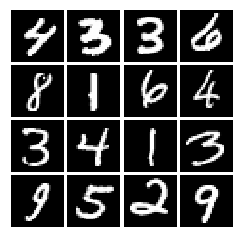

(16, 28, 28, 1)


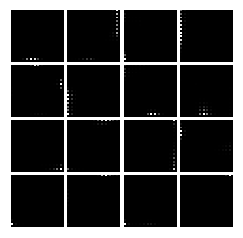

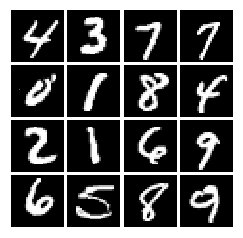

(16, 28, 28, 1)


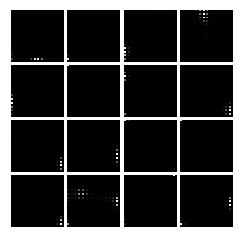

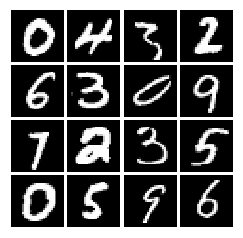

(16, 28, 28, 1)


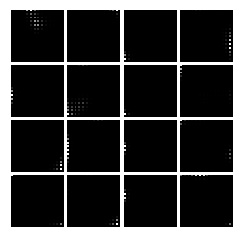

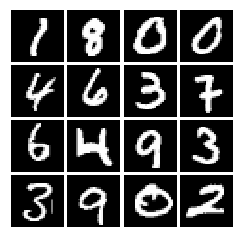

(16, 28, 28, 1)


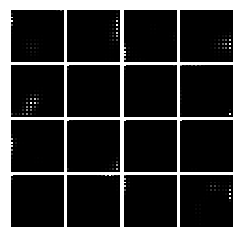

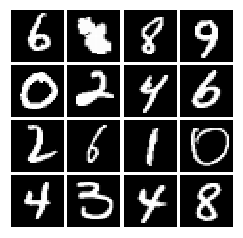

(16, 28, 28, 1)


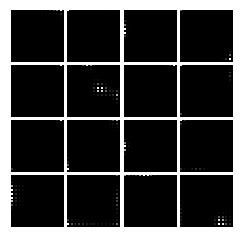

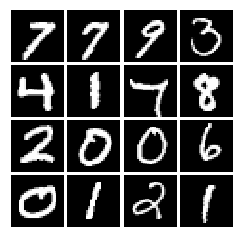

(16, 28, 28, 1)


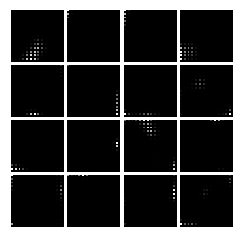

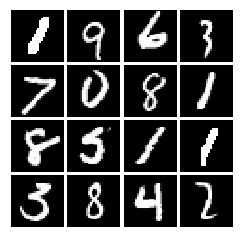

(16, 28, 28, 1)


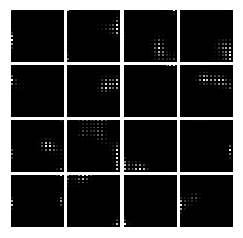

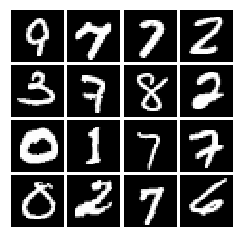

(16, 28, 28, 1)


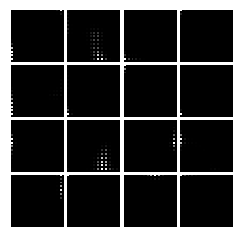

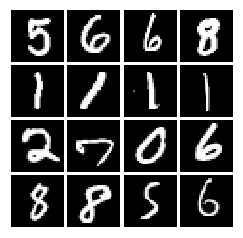

(16, 28, 28, 1)


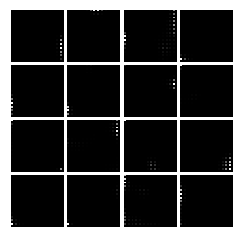

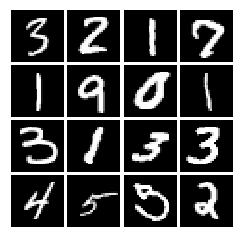

(16, 28, 28, 1)


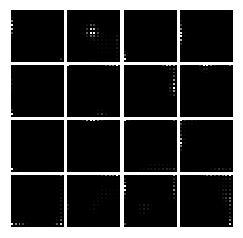

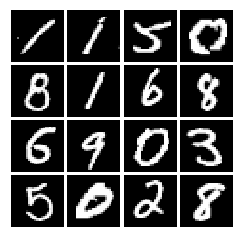

(16, 28, 28, 1)


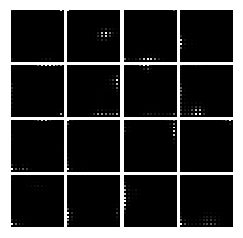

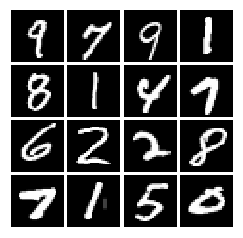

(16, 28, 28, 1)


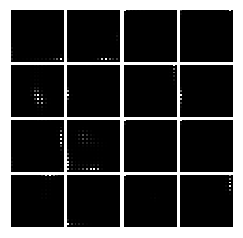

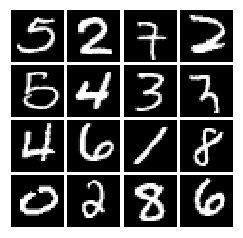

(16, 28, 28, 1)


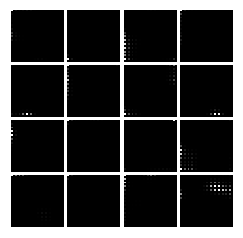

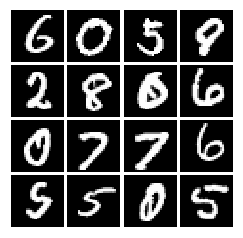

(16, 28, 28, 1)


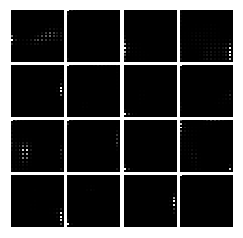

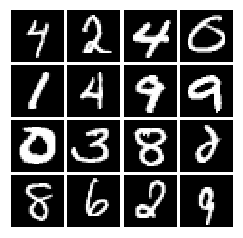

(16, 28, 28, 1)


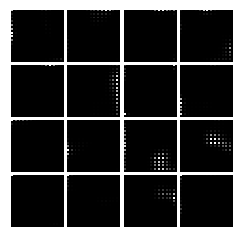

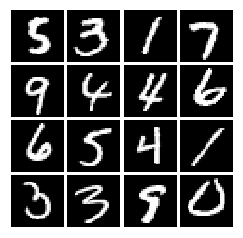

(16, 28, 28, 1)


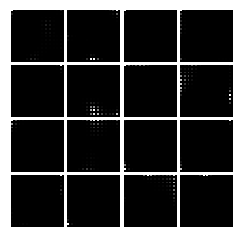

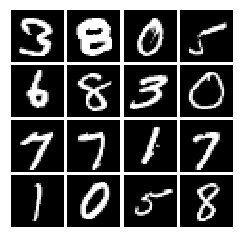

(16, 28, 28, 1)


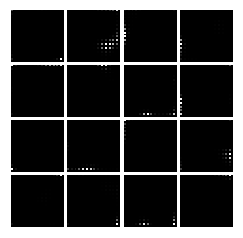

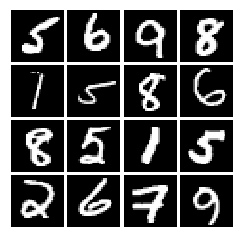

(16, 28, 28, 1)


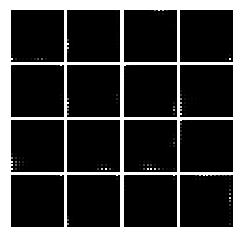

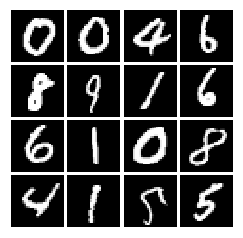

(16, 28, 28, 1)


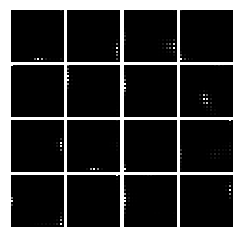

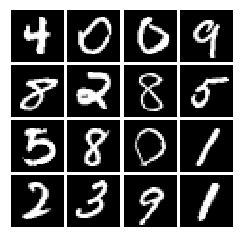

(16, 28, 28, 1)


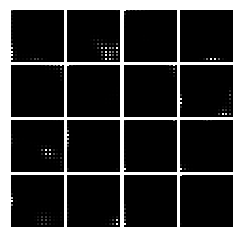

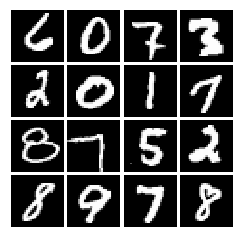

(16, 28, 28, 1)


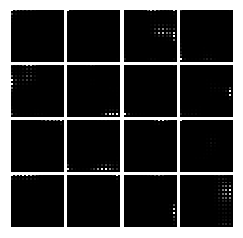

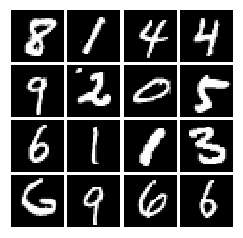

(16, 28, 28, 1)


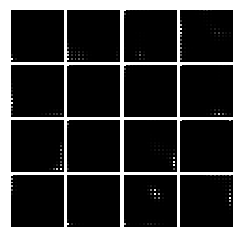

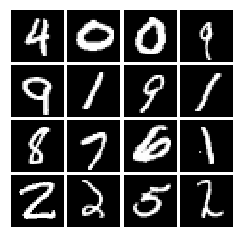

(16, 28, 28, 1)


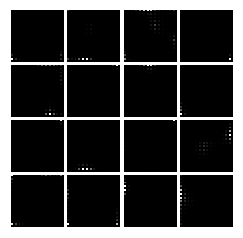

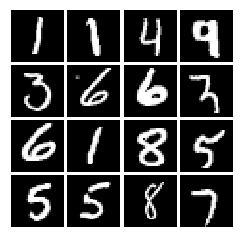

(16, 28, 28, 1)


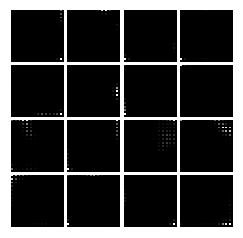

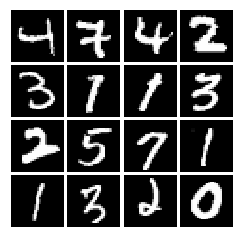

(16, 28, 28, 1)


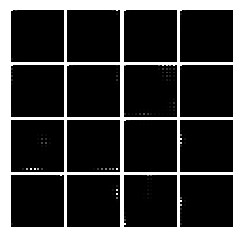

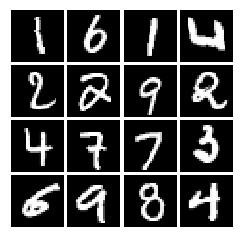

(16, 28, 28, 1)


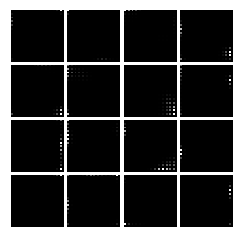

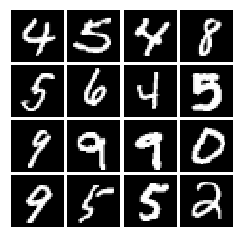

(16, 28, 28, 1)


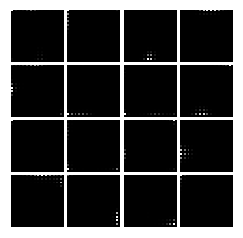

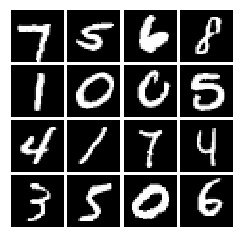

(16, 28, 28, 1)


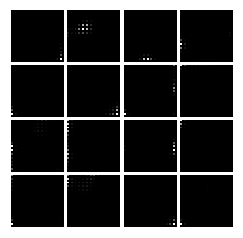

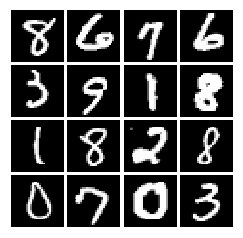

(16, 28, 28, 1)


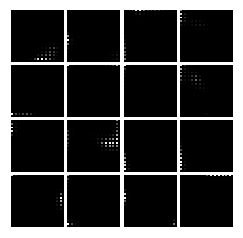

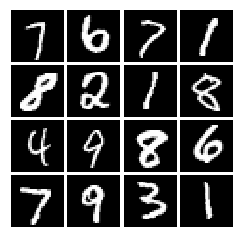

(16, 28, 28, 1)


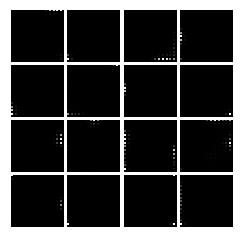

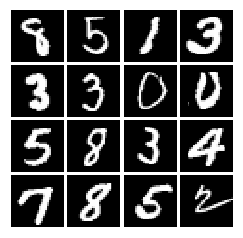

(16, 28, 28, 1)


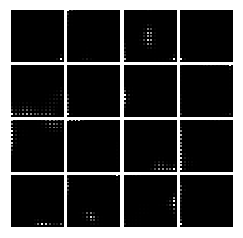

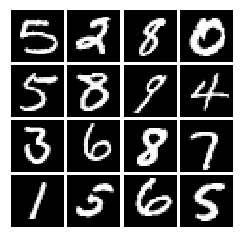

(16, 28, 28, 1)


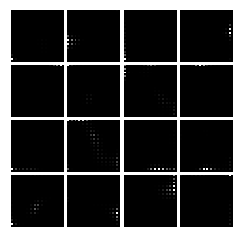

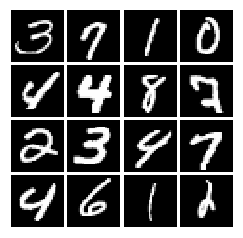

(16, 28, 28, 1)


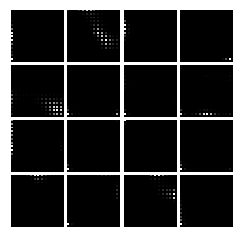

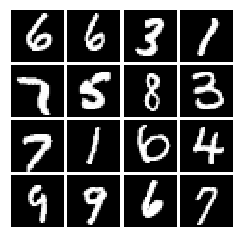

(16, 28, 28, 1)


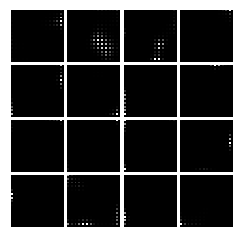

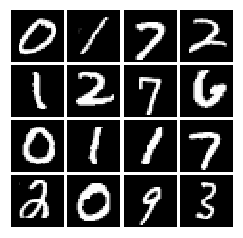

(16, 28, 28, 1)


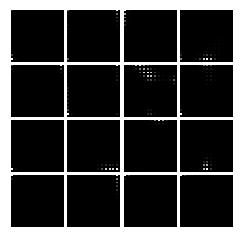

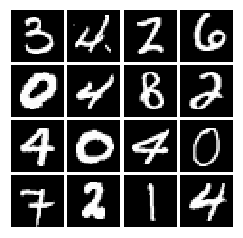

(16, 28, 28, 1)


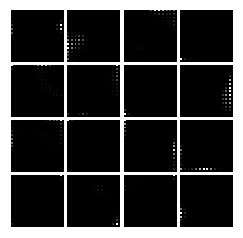

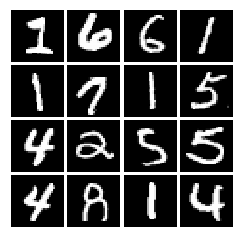

(16, 28, 28, 1)


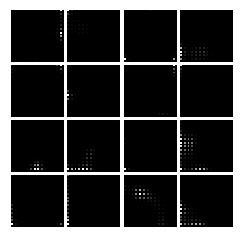

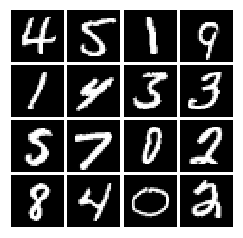

(16, 28, 28, 1)


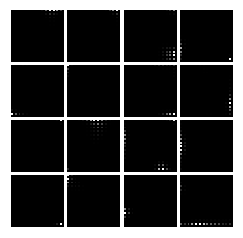

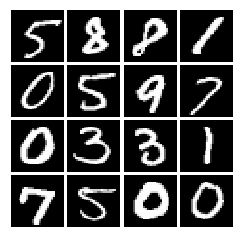

(16, 28, 28, 1)


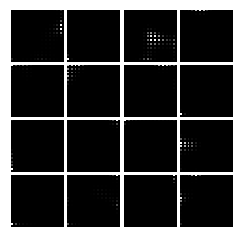

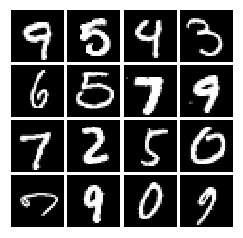

(16, 28, 28, 1)


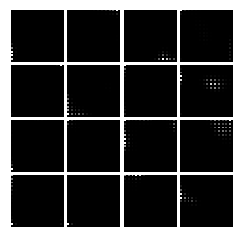

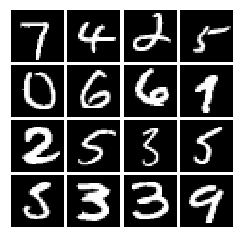

(16, 28, 28, 1)


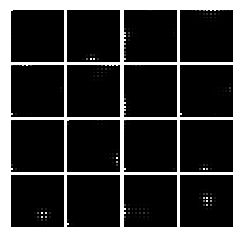

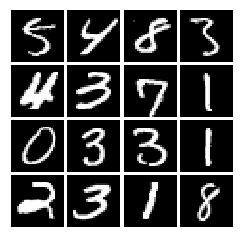

(16, 28, 28, 1)


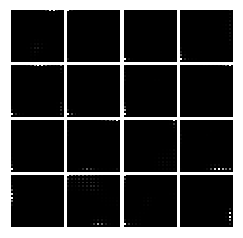

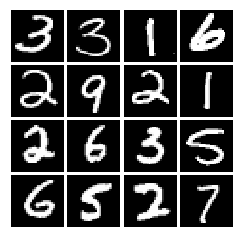

(16, 28, 28, 1)


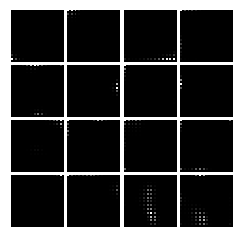

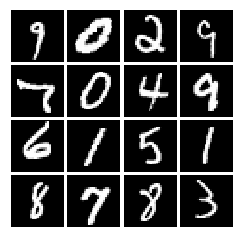

(16, 28, 28, 1)


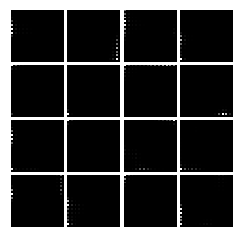

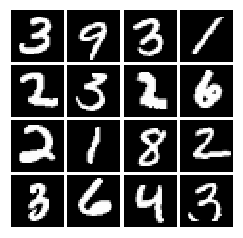

(16, 28, 28, 1)


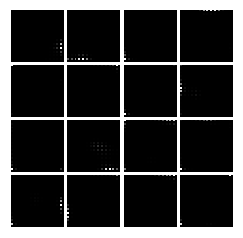

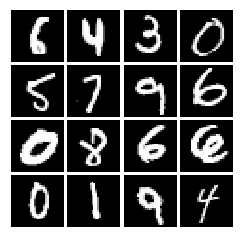

(16, 28, 28, 1)


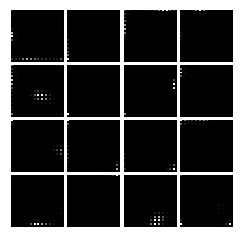

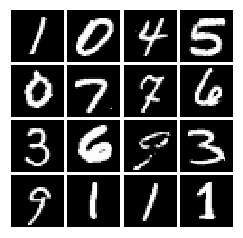

(16, 28, 28, 1)


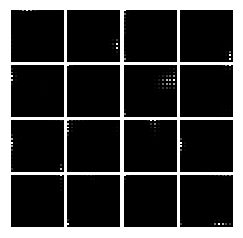

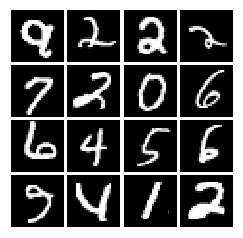

(16, 28, 28, 1)


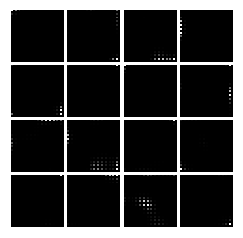

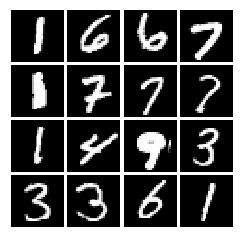

(16, 28, 28, 1)


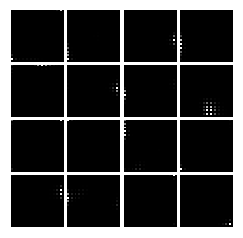

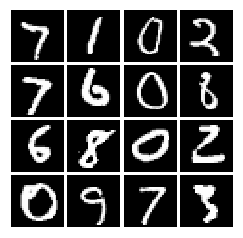

(16, 28, 28, 1)


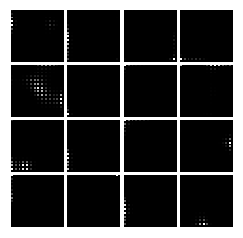

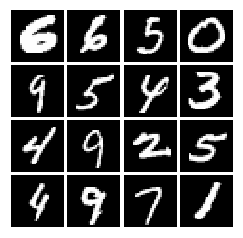

(16, 28, 28, 1)


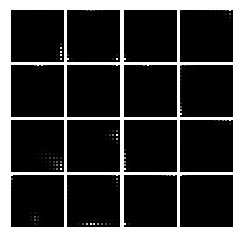

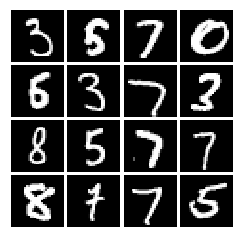

(16, 28, 28, 1)


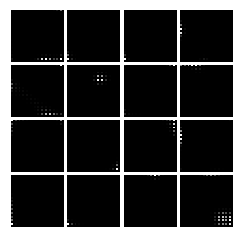

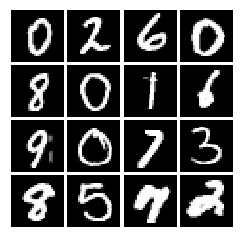

(16, 28, 28, 1)


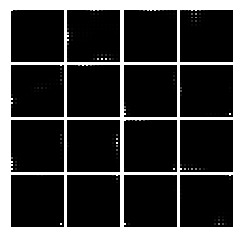

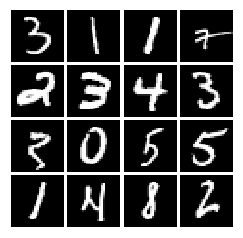

(16, 28, 28, 1)


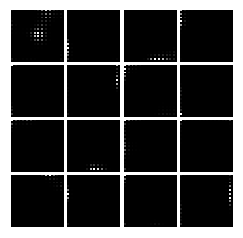

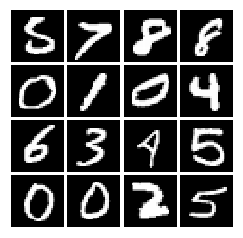

(16, 28, 28, 1)


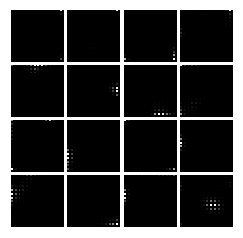

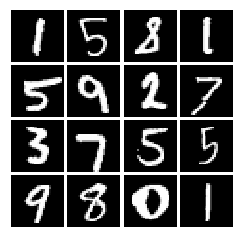

(16, 28, 28, 1)


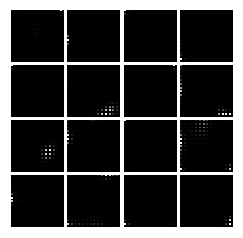

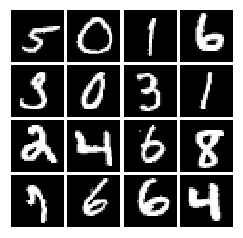

(16, 28, 28, 1)


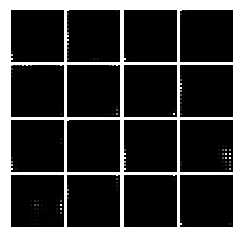

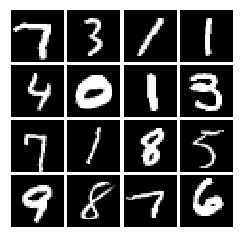

(16, 28, 28, 1)


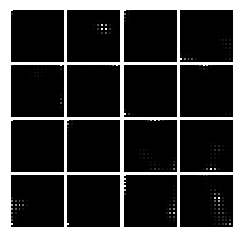

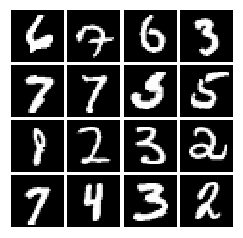

(16, 28, 28, 1)


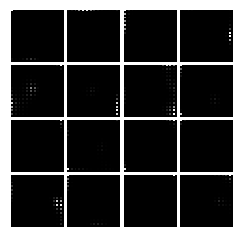

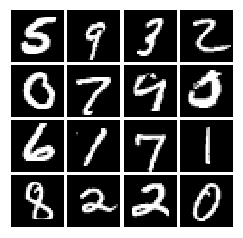

(16, 28, 28, 1)


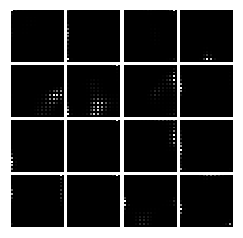

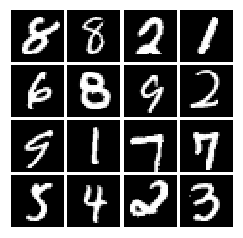

(16, 28, 28, 1)


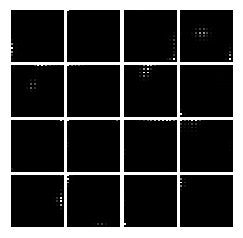

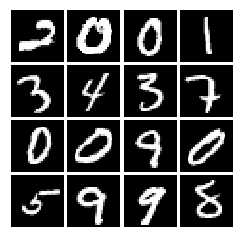

(16, 28, 28, 1)


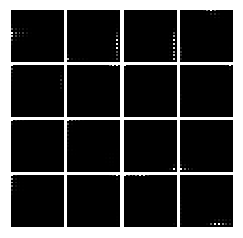

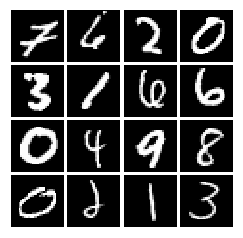

(16, 28, 28, 1)


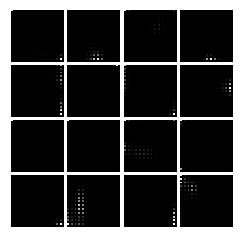

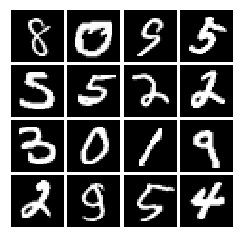

(16, 28, 28, 1)


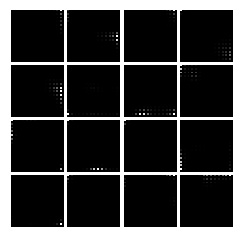

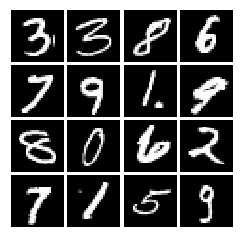

(16, 28, 28, 1)


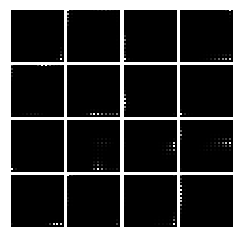

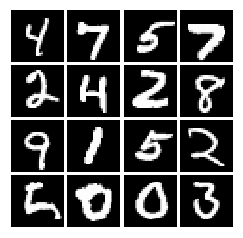

(16, 28, 28, 1)


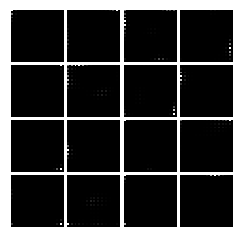

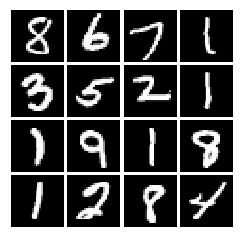

(16, 28, 28, 1)


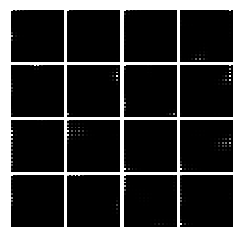

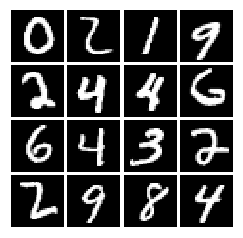

(16, 28, 28, 1)


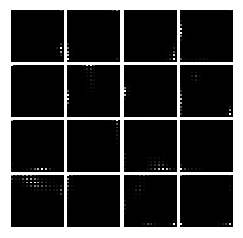

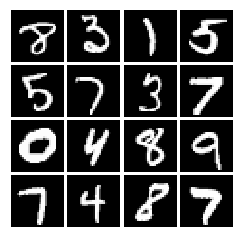

(16, 28, 28, 1)


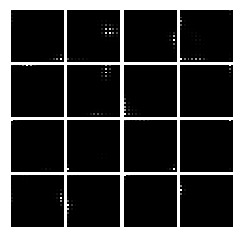

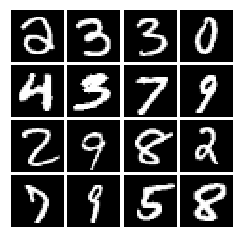

(16, 28, 28, 1)


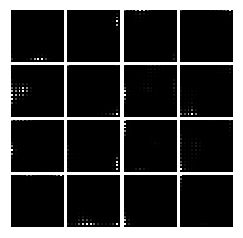

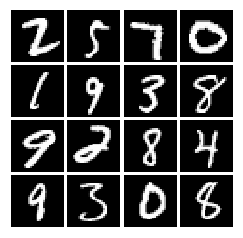

(16, 28, 28, 1)


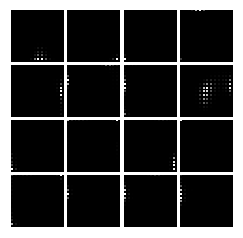

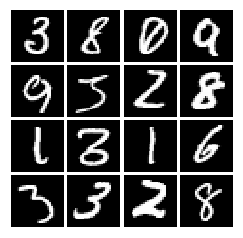

(16, 28, 28, 1)


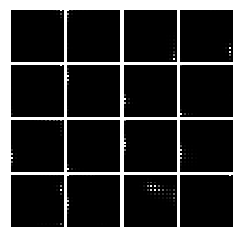

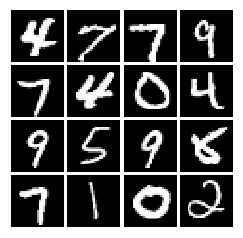

(16, 28, 28, 1)


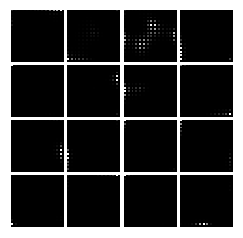

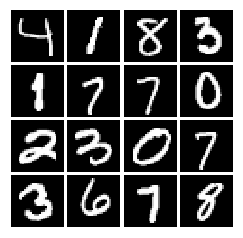

(16, 28, 28, 1)


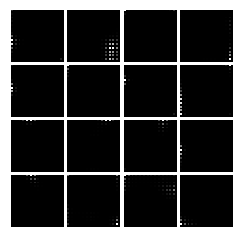

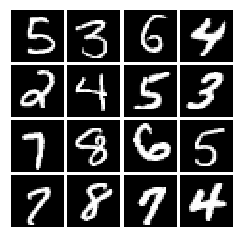

(16, 28, 28, 1)


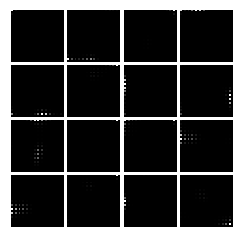

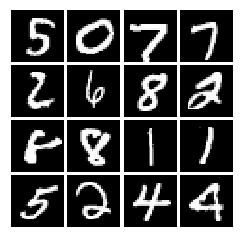

(16, 28, 28, 1)


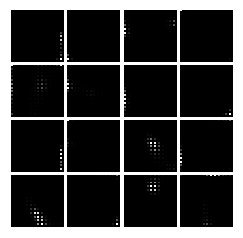

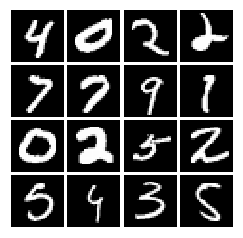

(16, 28, 28, 1)


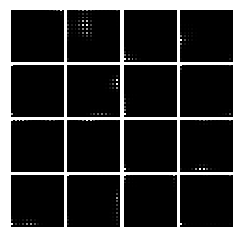

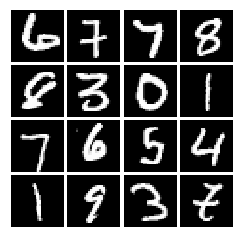

(16, 28, 28, 1)


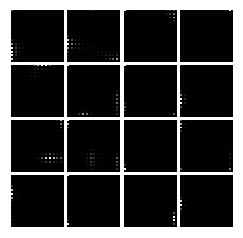

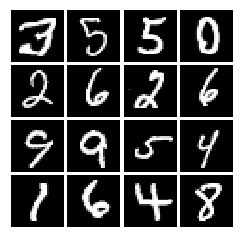

(16, 28, 28, 1)


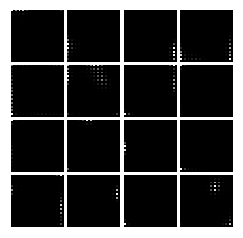

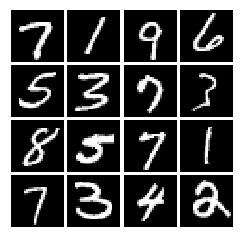

(16, 28, 28, 1)


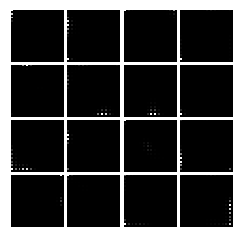

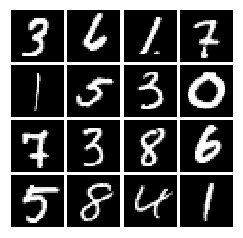

(16, 28, 28, 1)


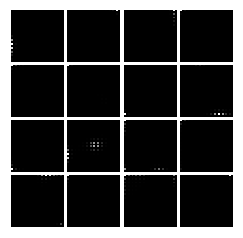

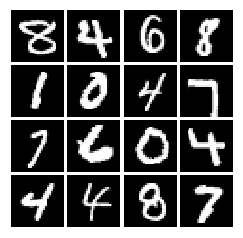

(16, 28, 28, 1)


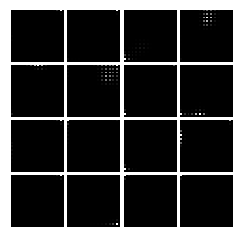

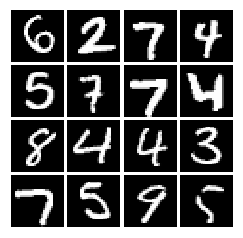

(16, 28, 28, 1)


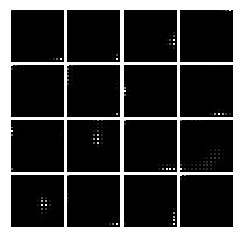

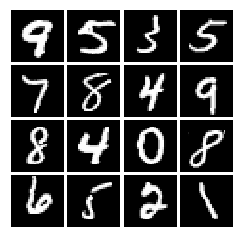

(16, 28, 28, 1)


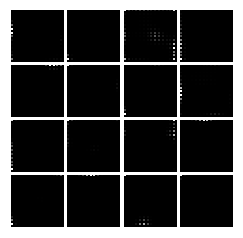

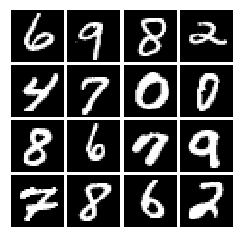

(16, 28, 28, 1)


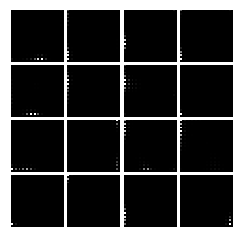

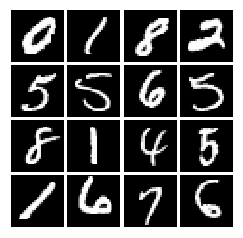

(16, 28, 28, 1)


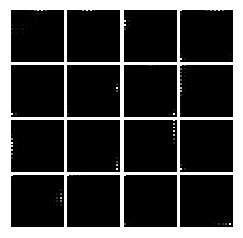

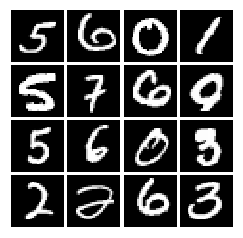

(16, 28, 28, 1)


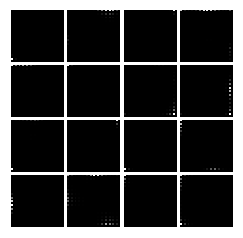

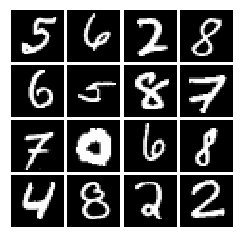

(16, 28, 28, 1)


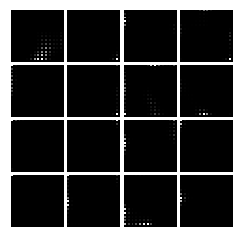

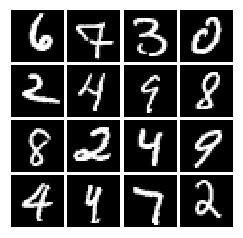

(16, 28, 28, 1)


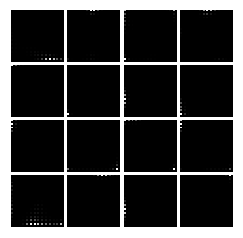

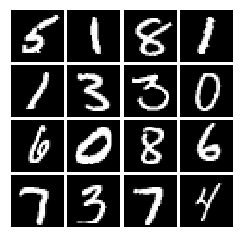

(16, 28, 28, 1)


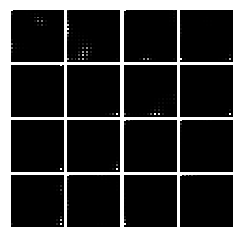

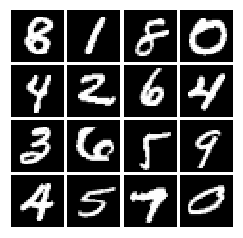

In [ ]:
# Name for tensorboard.
name = 'tb_'+ str(datetime.datetime.now().strftime('%Y-%m-%d_%H%M_%S'))
cwd = os.getcwd()
tb_path = os.path.join(cwd, "Tensorboard")
tb_path = os.path.join(tb_path, name)


mb_size = 128
Z_dim = 100
# Launch the graph
sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(tb_path, sess.graph)
disc_output = [D_solver, D_loss, merged_summaries]
gen_output = [G_solver, G_loss]

i = 0
try:
    step = 1
    # Keep training until max iterations is reached
    while step * batch_size < training_iters:
        # load first batch
        X_mb, _ = train_dataSet.next_batch(mb_size)
        feed_dict_disc = {x: X_mb, Z: sample_Z(mb_size, Z_dim)}
        feed_dict_gen = {Z: sample_Z(mb_size, Z_dim)}
        _, D_loss_curr,summary = sess.run(disc_output, feed_dict=feed_dict_disc)
        _, G_loss_curr = sess.run(gen_output, feed_dict=feed_dict_gen)

        # Testing step see if data is converging
        if step % display_step == 0:
            samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim)})
            fig = plot(samples)
            print(samples.shape)
            plt.savefig('out/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
            i += 1
            plt.show()
            plt.close(fig)
            fig2 = plot(X_mb[:16])
            plt.show()
            plt.close(fig2)
            writer.add_summary(summary, step)
        step += 1

    print("\nOptimization Finished!, Training Accuracy= {:.3f}".format(acc))

except KeyboardInterrupt:
    pass

In [ ]:
# Inference
# Test on the test dataset to see how good our network is]
# append accuracies from each batch
acc_app=[]
for i in range(10):
    batch_x, batch_y = test_dataSet.next_batch(1056)
    feed_dict={x: batch_x, y: batch_y, keep_prob: 1.}
    # Forward pass and return accuracy and predictions
    acc, cp = sess.run([accuracy, predictions], feed_dict)
    acc_app.append(acc)
mean = np.mean(np.array(acc_app))
print("Accuracy for the testing dataset is: {0:.4f}".format(mean))

In [ ]:
# select a random sample in the test data
rnd = np.random.randint(len(test_dataSet.data)-1)
image = test_dataSet.data[rnd]
label = test_dataSet.label[rnd]
show = np.reshape(image,(28,28))
plt.imshow(show, cmap='gray')
plt.show()

In [ ]:
# expand dimensions of image to have get right dimensions
# basically saying the input has a batch size of 1
exp_img = np.expand_dims(image, 0)
feed_dict={x: exp_img, y: label, keep_prob: 1.}
acc, pred = sess.run([accuracy, predictions], feed_dict)

print("Prediction: {0} \nLabel: {1} \nis equal? {2}".format(pred[0], label, pred[0] == label))